In [71]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.integrate import solve_ivp
from scipy.signal import find_peaks

Set of Differential Equations using 4th Order Runge Kutta Algorithm

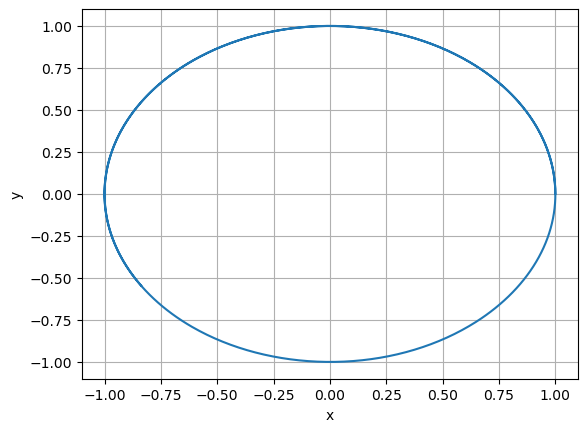

In [78]:
def f(t,r):
    x,y = r
    fx = -y
    fy = x
    return fx, fy

r0 = (1,0)
t_span =(0,10)
t_eval = np.linspace(0,10,1000)

sol = integrate.solve_ivp(f, t_span, r0, t_eval= t_eval)
x,y = sol.y
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.show()

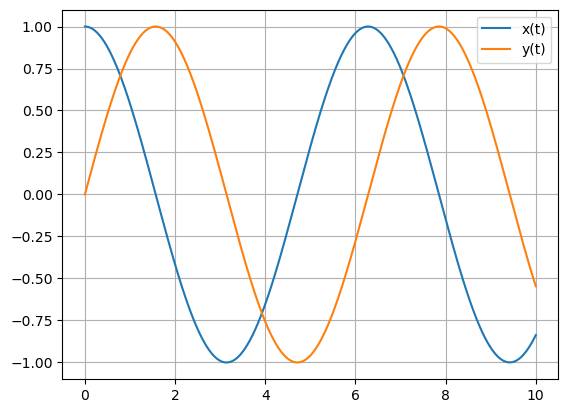

In [7]:
t = sol.t
plt.plot(t,x, label = 'x(t)')
plt.plot(t,y, label = 'y(t)')
plt.grid()
plt.legend()
plt.show()

HARMONIC OSCILLATOR

Part a

In [13]:
def harmonic_oscillator(t, z, delta, omega, gamma):
    x, v = z  # z[0] = x (displacement), z[1] = v (velocity)
    dxdt = v
    dvdt = -delta * v - omega**2 * x + gamma * np.cos(omega * t)
    return [dxdt, dvdt]

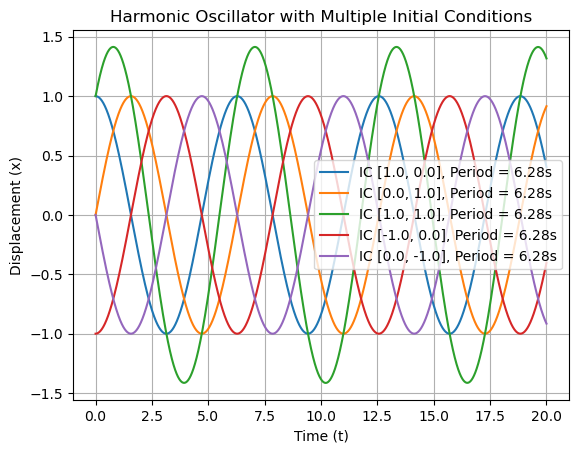

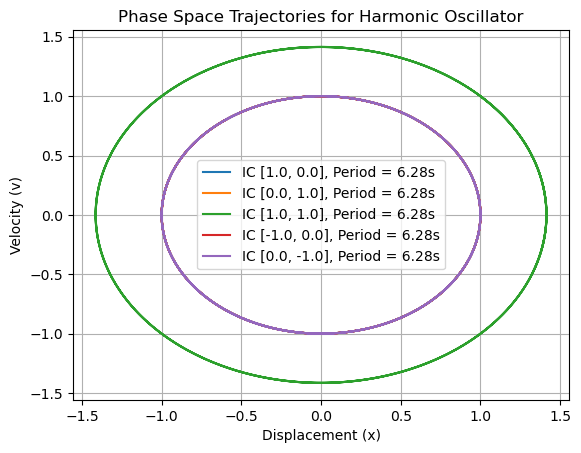

In [86]:
delta = 0.0  
gamma = 0.0  
omega = 1.0  


initial_conditions = [[1.0, 0.0], [0.0, 1.0], [1.0, 1.0], [-1.0, 0.0], [0.0, -1.0]]

t_span = (0, 20)
t_eval = np.linspace(0, 20, 5000)


def calculate_period(t, x):
    zero_crossings = np.where(np.diff(np.sign(x)))[0]
    if len(zero_crossings) > 1: 
        periods = np.diff(t[zero_crossings]) * 2
        return np.mean(periods) 
    return None


results = []
for z0 in initial_conditions:
    solution = integrate.solve_ivp(harmonic_oscillator, t_span, z0, args=(delta, omega, gamma), t_eval=t_eval)
    x = solution.y[0]
    t = solution.t
    period = calculate_period(t, x)
    results.append((z0, t, x, period))


for z0, t, x, period in results:
    plt.plot(t, x, label=f"IC {z0}, Period = {period:.2f}s" if period else f"IC {z0}")
plt.xlabel("Time (t)")
plt.ylabel("Displacement (x)")
plt.title("Harmonic Oscillator with Multiple Initial Conditions")
plt.legend()
plt.grid()
plt.show()



for z0, t, x, period in results:
    solution = integrate.solve_ivp(harmonic_oscillator, t_span, z0, args=(delta, omega, gamma), t_eval=t_eval)
    v = solution.y[1]
    plt.plot(x, v, label=f"IC {z0}, Period = {period:.2f}s" if period else f"IC {z0}")
plt.xlabel("Displacement (x)")
plt.ylabel("Velocity (v)")
plt.title("Phase Space Trajectories for Harmonic Oscillator")
plt.legend()
plt.grid()
plt.show()

Part b

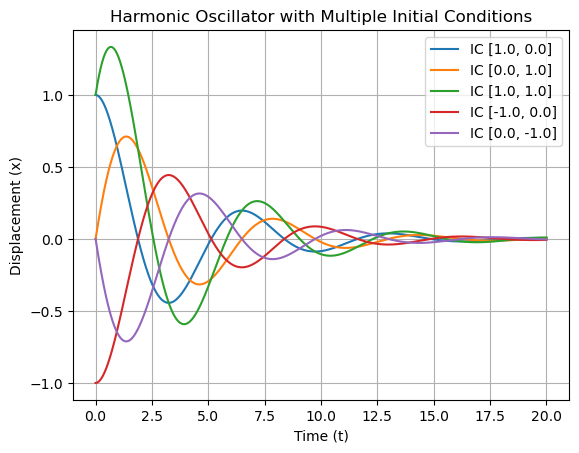

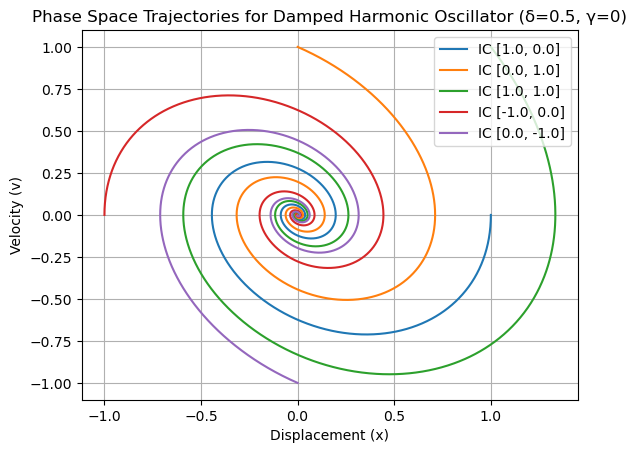

In [18]:
delta = 0.5
gamma = 0
omega = 1

initial_conditions = [[1.0, 0.0], [0.0, 1.0], [1.0, 1.0], [-1.0, 0.0], [0.0, -1.0]]

t_span = (0, 20)
t_eval = np.linspace(0, 20, 5000)

results = []
for z0 in initial_conditions:
    solution = integrate.solve_ivp(harmonic_oscillator, t_span, z0, args=(delta, omega, gamma), t_eval=t_eval)
    x = solution.y[0]
    v = solution.y[1]
    t = solution.t
    results.append((z0, t, x, v))


for z0, t, x, v in results:
    plt.plot(t, x, label=f"IC {z0}")
plt.xlabel("Time (t)")
plt.ylabel("Displacement (x)")
plt.title("Harmonic Oscillator with Multiple Initial Conditions")
plt.legend()
plt.grid()
plt.show()

for z0, t, x, v in results:
    plt.plot(x, v, label=f"IC {z0}")
plt.xlabel("Displacement (x)")
plt.ylabel("Velocity (v)")
plt.title("Phase Space Trajectories for Damped Harmonic Oscillator (δ=0.5, γ=0)")
plt.legend()
plt.grid()
plt.show()


Part c

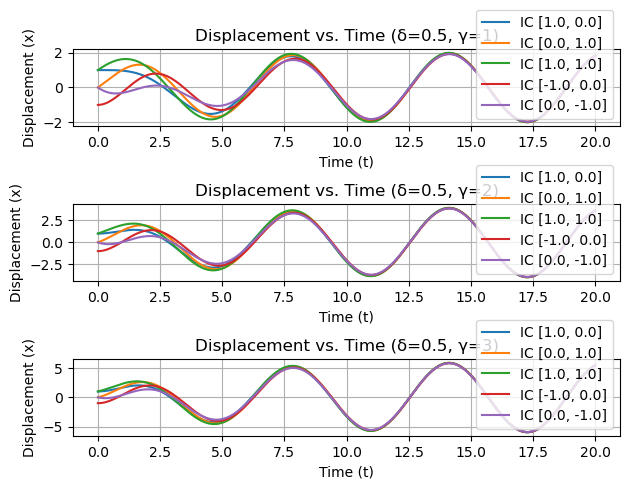

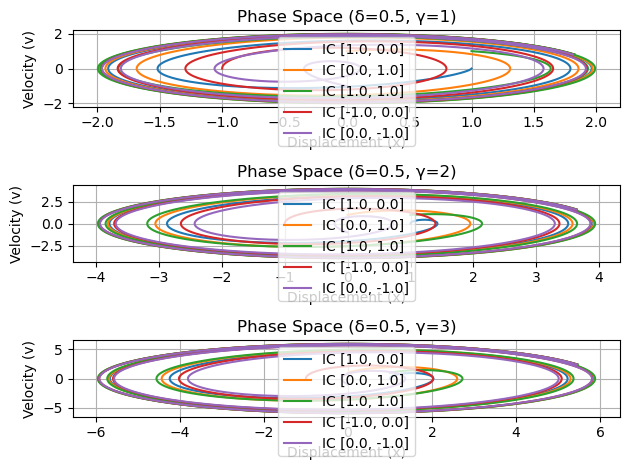

In [20]:
delta = 0.5
gamma_values = [1,2,3]
omega = 1

initial_conditions = [[1.0, 0.0], [0.0, 1.0], [1.0, 1.0], [-1.0, 0.0], [0.0, -1.0]]

t_span = (0, 20)
t_eval = np.linspace(0, 20, 5000)

results = []
for gamma in gamma_values:
    for z0 in initial_conditions:
        solution = integrate.solve_ivp(harmonic_oscillator, t_span, z0, args=(delta, omega, gamma), t_eval=t_eval)
        x = solution.y[0]
        v = solution.y[1]
        t = solution.t
        results.append((gamma, z0, t, x, v))



for gamma in gamma_values:
    plt.subplot(3, 1, gamma_values.index(gamma) + 1)
    for z0, t, x, v in [(z, t, x, v) for g, z, t, x, v in results if g == gamma]:
        plt.plot(t, x, label=f"IC {z0}")
    plt.title(f"Displacement vs. Time (δ=0.5, γ={gamma})")
    plt.xlabel("Time (t)")
    plt.ylabel("Displacement (x)")
    plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()


for gamma in gamma_values:
    plt.subplot(3, 1, gamma_values.index(gamma) + 1)
    for z0, t, x, v in [(z, t, x, v) for g, z, t, x, v in results if g == gamma]:
        plt.plot(x, v, label=f"IC {z0}")
    plt.title(f"Phase Space (δ=0.5, γ={gamma})")
    plt.xlabel("Displacement (x)")
    plt.ylabel("Velocity (v)")
    plt.legend()
    plt.grid()

plt.tight_layout()
plt.show()

DUFFING OSCILLATOR

Part a

In [24]:
def duffing_oscillator(t, z, delta, beta, alpha, gamma, omega):
    x, v = z  # z[0] = x (displacement), z[1] = v (velocity)
    dxdt = v
    dvdt = -delta * v - beta * x - alpha * x**3 + gamma * np.cos(omega * t)
    return [dxdt, dvdt]

In [25]:
delta = 0
gamma = 0
beta = -1
alpha = 1
omega = 0

In [26]:
def energy(x, v):
    Kinetic_Energy = 0.5 * v**2 #took m = 1
    Potential_Energy = 0.25*x**4 - 0.5*x**2
    return Kinetic_Energy + Potential_Energy

In [27]:
x0 = 1.0
v0 = 0.0
z0 = [x0,v0]
t_span = (0,30)
t_eval = np.linspace(0, 30, 1000)

In [28]:
solution = integrate.solve_ivp(duffing_oscillator, t_span, z0, t_eval = t_eval, args = (delta, beta, alpha, gamma, omega))

In [35]:
x = solution.y[0]
v = solution.y[1]
t = solution.t

In [37]:
energy = energy(x, v)

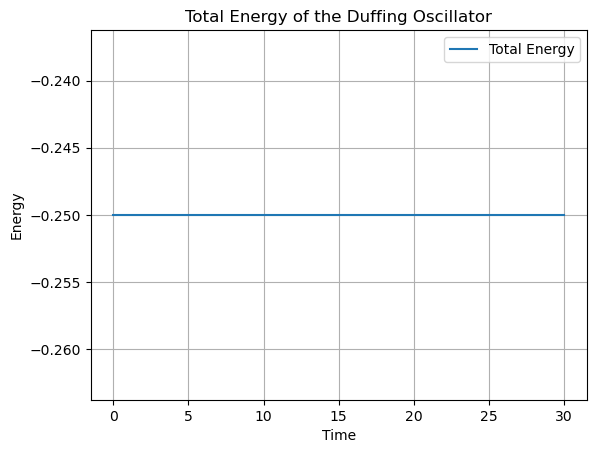

In [39]:
plt.plot(t, energy, label="Total Energy")
plt.xlabel("Time")
plt.ylabel("Energy")
plt.title("Total Energy of the Duffing Oscillator")
plt.legend()
plt.grid()
plt.show()

Part b

In [42]:
def duffing_oscillator(t, z, delta, beta, alpha, gamma, omega):
    x, v = z  # z[0] = x (displacement), z[1] = v (velocity)
    dxdt = v
    dvdt = - delta * v - beta * x - alpha * x**3 + gamma * np.cos(omega * t)
    return dxdt, dvdt

In [44]:
def calculate_period(t, x):
    zero_crossings = np.where(np.diff(np.sign(x)))[0]
    if len(zero_crossings) > 1: 
        periods = np.diff(t[zero_crossings]) * 2
        return np.mean(periods) 
    return None

In [46]:
delta = 0
gamma = 0
beta = -1
alpha = 1
omega = 1

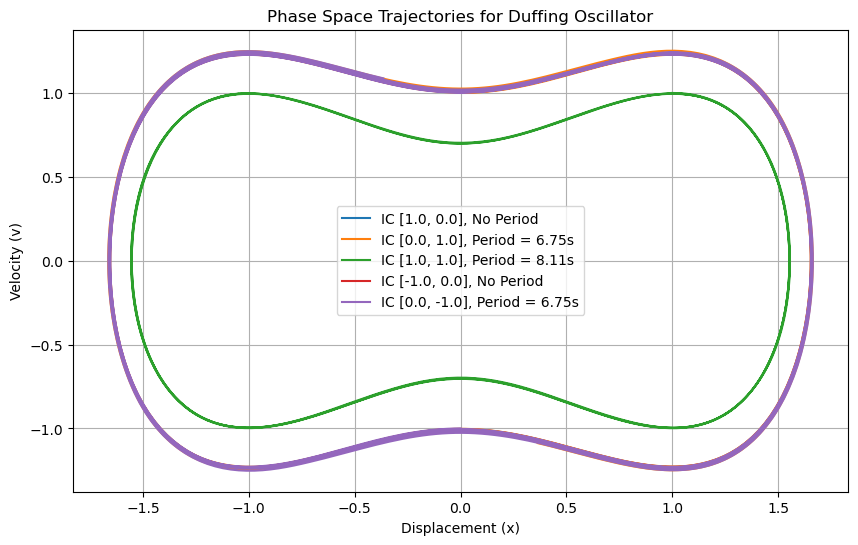

In [48]:
initial_conditions = [[1.0, 0.0], [0.0, 1.0], [1.0, 1.0], [-1.0, 0.0], [0.0, -1.0]]

t_span = (0, 30)
t_eval = np.linspace(0, 30, 1000)

results = []
for z0 in initial_conditions:
    solution = solve_ivp(duffing_oscillator, t_span, z0, args=(delta, beta, alpha, gamma, omega), t_eval=t_eval)
    x = solution.y[0]
    v = solution.y[1]
    t = solution.t
    period = calculate_period(t, x)
    results.append((z0, x, v, period))

plt.figure(figsize=(10, 6))
for z0, x, v, period in results:
    if period:
        label = f"IC {z0}, Period = {period:.2f}s"
    else:
        label = f"IC {z0}, No Period"
    plt.plot(x, v, label=label)

plt.xlabel("Displacement (x)")
plt.ylabel("Velocity (v)")
plt.title("Phase Space Trajectories for Duffing Oscillator")
plt.legend()
plt.grid()
plt.show()

Part c

In [102]:
def duffing_oscillator(t, z, delta, beta, alpha, gamma, omega):
    x, v = z  # z[0] = x (displacement), z[1] = v (velocity)
    dxdt = v
    dvdt = - delta * v - beta * x - alpha * x**3 + gamma * np.cos(omega * t)
    return [dxdt, dvdt]

In [104]:
delta = 0.5
gamma = 0
beta = -1
alpha = 1
omega = 1

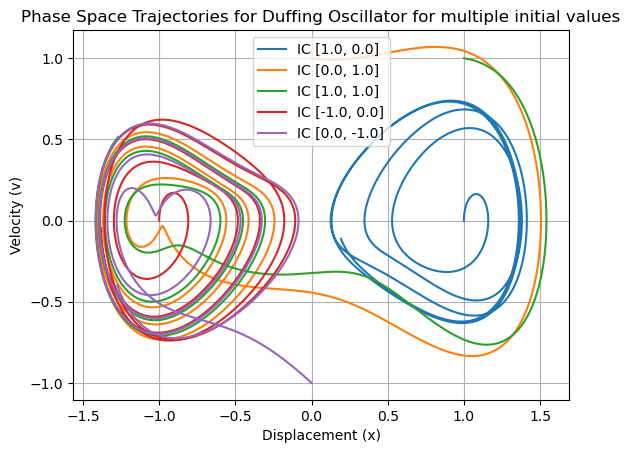

In [128]:
initial_conditions = [[1.0, 0.0], [0.0, 1.0], [1.0, 1.0], [-1.0, 0.0], [0.0, -1.0]]

t_span = (0, 30)
t_eval = np.linspace(0, 30, 1000)

for z0 in initial_conditions:
    solution = solve_ivp(duffing_oscillator, t_span, z0, args=(delta, beta, alpha, gamma, omega), t_eval=t_eval)
    x = solution.y[0]
    v = solution.y[1]
    results.append((z0, x, v))
    plt.plot(x, v, label=f"IC {z0}")

plt.xlabel("Displacement (x)")
plt.ylabel("Velocity (v)")
plt.title("Phase Space Trajectories for Duffing Oscillator for multiple initial values")
plt.legend()
plt.grid()
plt.show()

Part d

In [131]:
def duffing_oscillator(t, z, delta, beta, alpha, gamma, omega):
    x, v = z  # z[0] = x (displacement), z[1] = v (velocity)
    dxdt = v
    dvdt = - delta * v - beta * x - alpha * x**3 + gamma * np.cos(omega * t)
    return [dxdt, dvdt]

In [133]:
delta = 0.5
gamma_values = [0.33,0.35,0.357,0.365]
beta = -1
alpha = 1
omega = 1

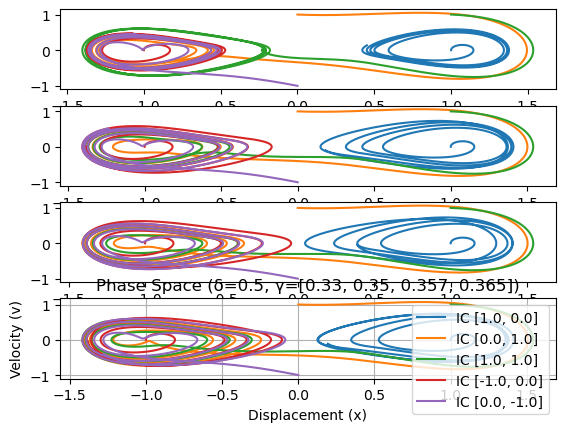

In [135]:
initial_conditions = [[1.0, 0.0], [0.0, 1.0], [1.0, 1.0], [-1.0, 0.0], [0.0, -1.0]]

t_span = (0, 30)
t_eval = np.linspace(0, 30, 5000)

results = []
for gamma in gamma_values:
    for z0 in initial_conditions:
        plt.subplot(4, 1, gamma_values.index(gamma) + 1)
        solution = integrate.solve_ivp(duffing_oscillator, t_span, z0, args=(delta, beta, alpha, gamma, omega), t_eval=t_eval)
        x = solution.y[0]
        v = solution.y[1]
        t = solution.t
        results.append((gamma, z0, t, x, v))
        plt.plot(x, v, label=f"IC {z0}")

plt.title(f"Phase Space (δ=0.5, γ={gamma_values})")
plt.xlabel("Displacement (x)")
plt.ylabel("Velocity (v)")
plt.legend()
plt.grid()
plt.show()